# Spectral estimation. Initial considerations. 

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
# Import of numpy to deal with numerical data in an efficient way
import numpy as np

# Imports for visualization. Matplotlib and seaborn to have a nice and appealing plots
import matplotlib.pyplot as plt
import matplotlib.gridspec as grds
import seaborn as sbrn

# Auxiliary imports. In this case two libraries one the typical os to deal with operative system commands and 
# the OpenEphys to load the recorded data from our OpenEphys system. More info about it here 
# https://github.com/open-ephys/analysis-tools
import OpenEphys as OE
import os

# Declaration that we want the code in line. If you prefer it to plot in a different window you can uncomment
# the line below.
%matplotlib inline
# %matplotlib qt

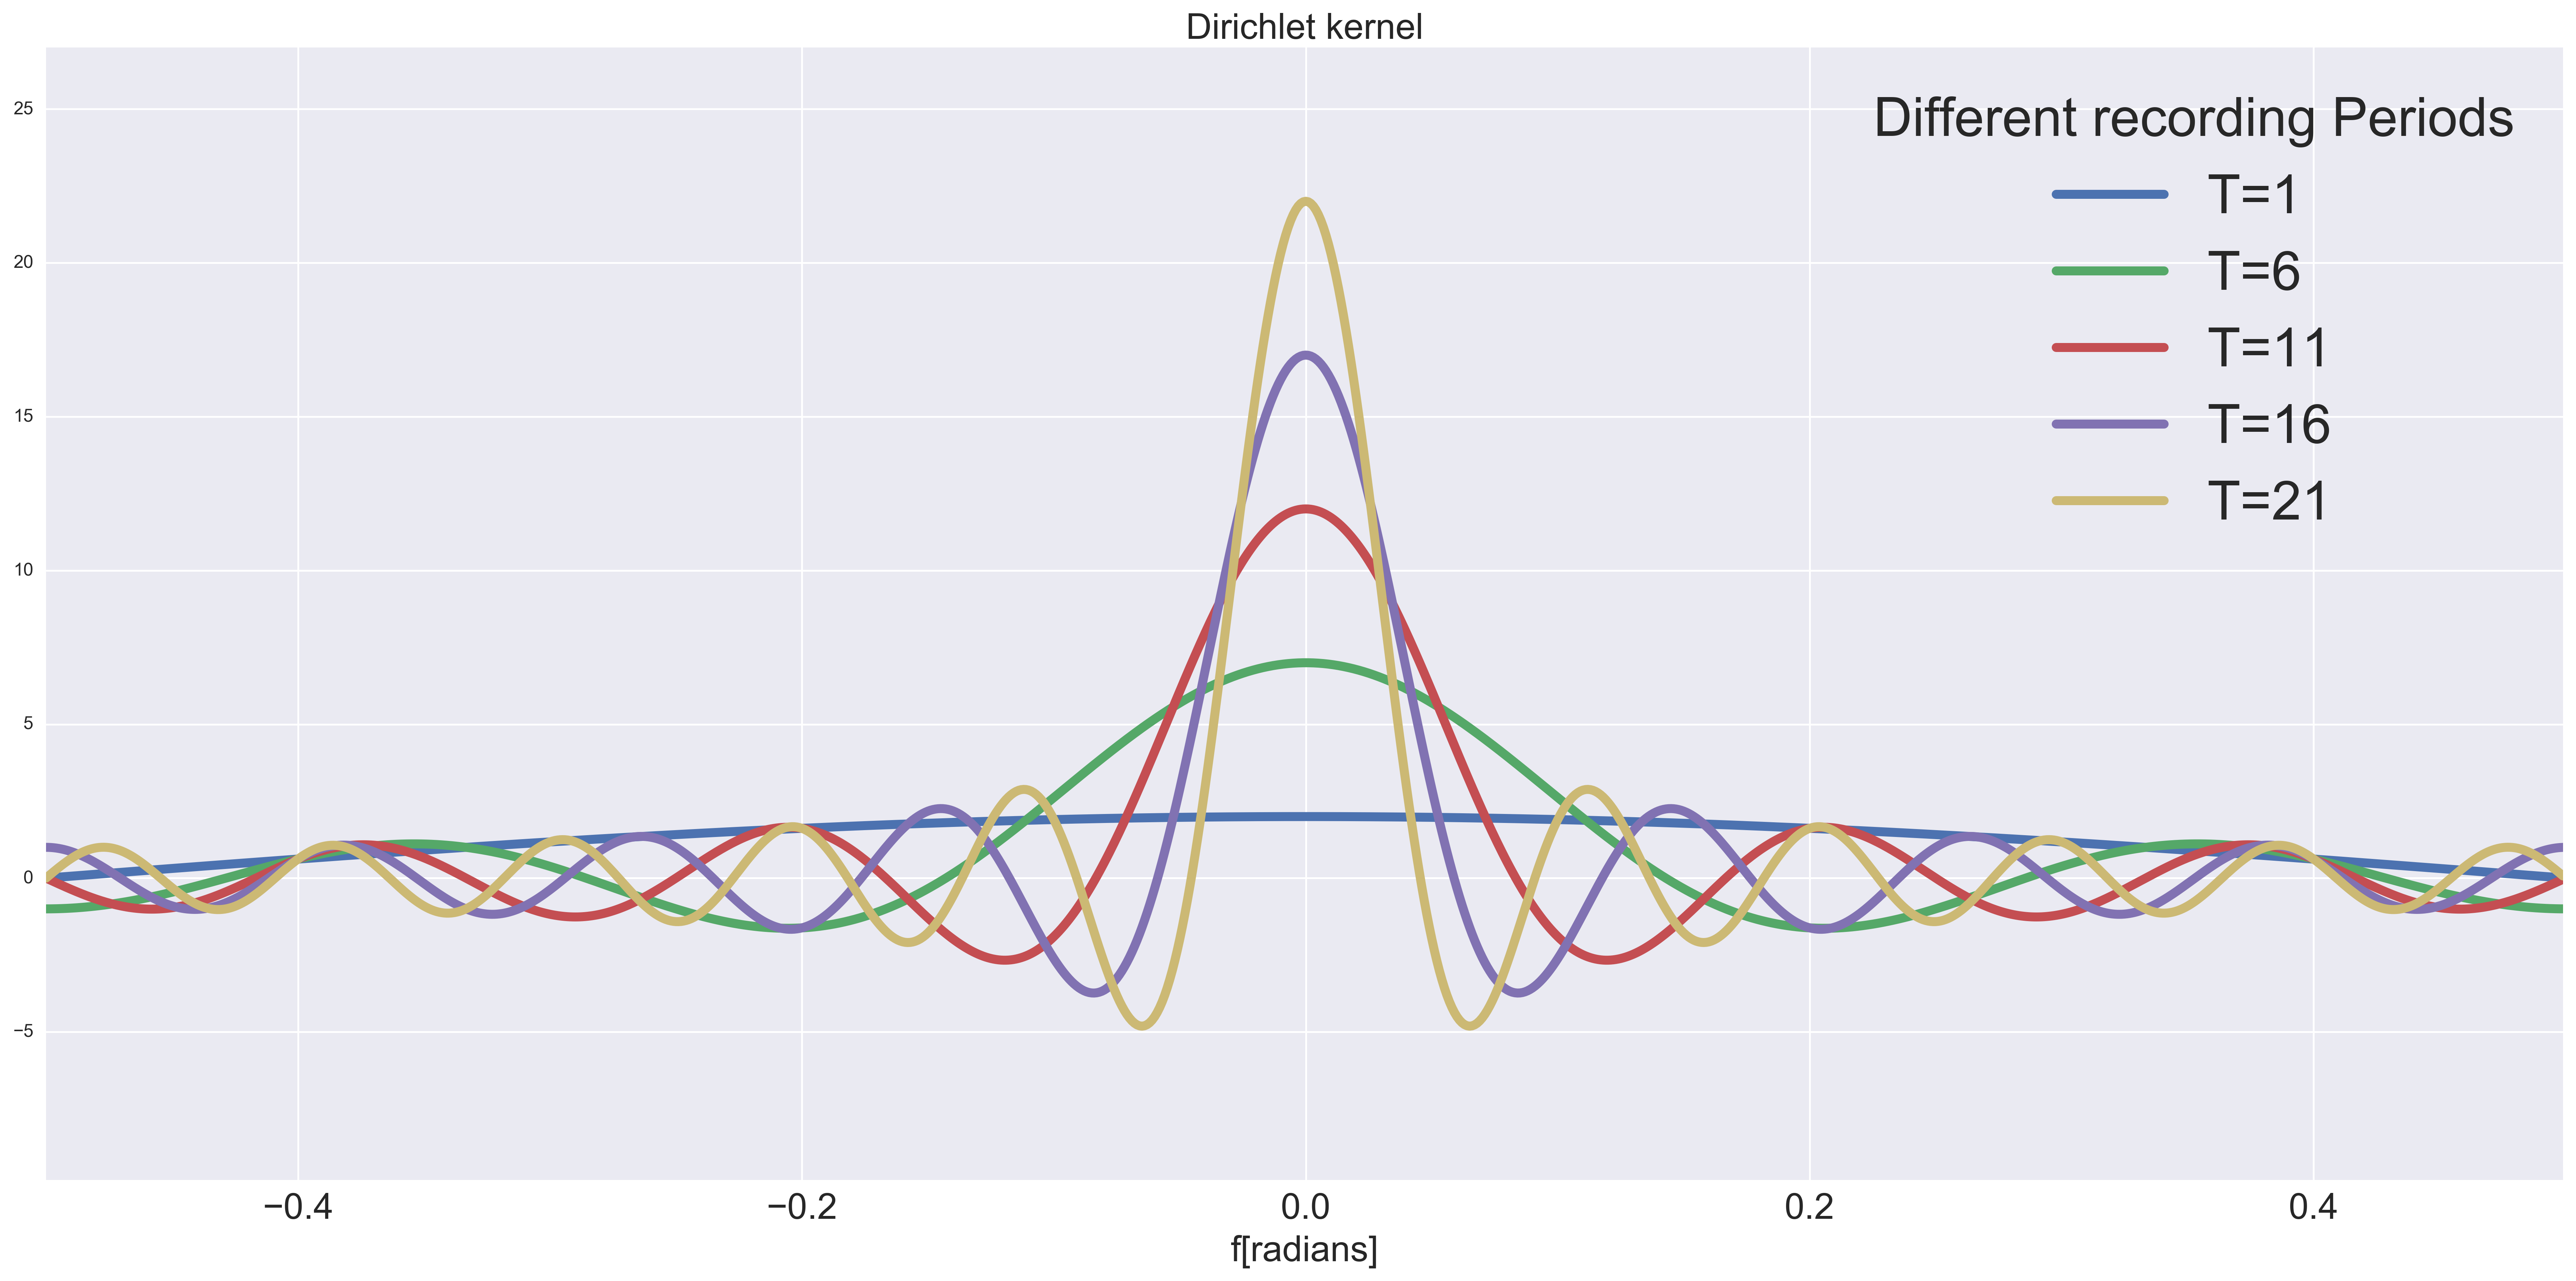

In [4]:
# Definition of the normalized range of frequencies
f = np.arange(-1.0/2,1.0/2,0.001)

# The different values for the parameter T, time of the observation in seconds
recording_periods=np.arange(1,26,5)

# Definition of the figure
figid = plt.figure(3,figsize=(20, 10), dpi=360)
# Next line is only interesting in case of defining a matrix of plots. Nonetheless I started using it because in
# in future figures I will use it. In this case is just a [1x1] matrix of plots i.e. one plot
gs = grds.GridSpec(1,1)
# Attach the subplot and define the range that takes of the current matrix of plots. In this case is the whole 
# matrix, from 0 to the end
ax1 = plt.subplot(gs[0, :])


# Definition of the different arrays that will store the information about the different lines in the plot (lines,
# legends, max values, etc.)
lines = []
lines_legends = []
plot_max=[]
plot_min=[]
# Plotting in a for loop based on the parameter T, the observation time, or the duratino of our observation window
for T in recording_periods:
    F=0
    #Definintion of the Dirichlet Kernel
    D = np.sin(np.pi*(f-F)*(T+1))/np.sin(np.pi*(f-F))
    
    #Keeping track of the max of each kernel to adjust the plot afterwards
    plot_max.append(max(D))
    plot_min.append(min(D))
    #Plotting the different functions and keeping their IDs in a vector...
    lines.append(ax1.plot(f,D,label='T='+str(T),linewidth=5))
    # as well with their legends
    lines_legends.append('T='+str(T))

# From now the code has nothing to do with calculations but with making a nice plot
# The first autoscale
plt.autoscale(enable=True, axis='both', tight=True)

# Defining the y limits of the plot
plot_max = max(plot_max)
plot_min = min(plot_min)
ax1.set_ylim([plot_min-5,plot_max+5])

# Setting the xlabel with the desired parameters
override = {
    'fontsize'            : '20',
    'verticalalignment'   : 'top',
    'horizontalalignment' : 'center'
    }
ax1.set_xlabel('f[radians]',override)

# Setting the title with the desired parameters
override = {
    'fontsize'            : '20',
    }
ax1.set_title('Dirichlet kernel',override)

# Setting the title with the desired parameters
legend = plt.legend(lines_legends,fontsize=30,title='Different recording Periods')
legend.get_title().set_fontsize('30')

# Changing the size of the ticks for better visualization
for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
    
plt.tight_layout()


plt.draw()

Loading continuous data from 100_CH129.continuous


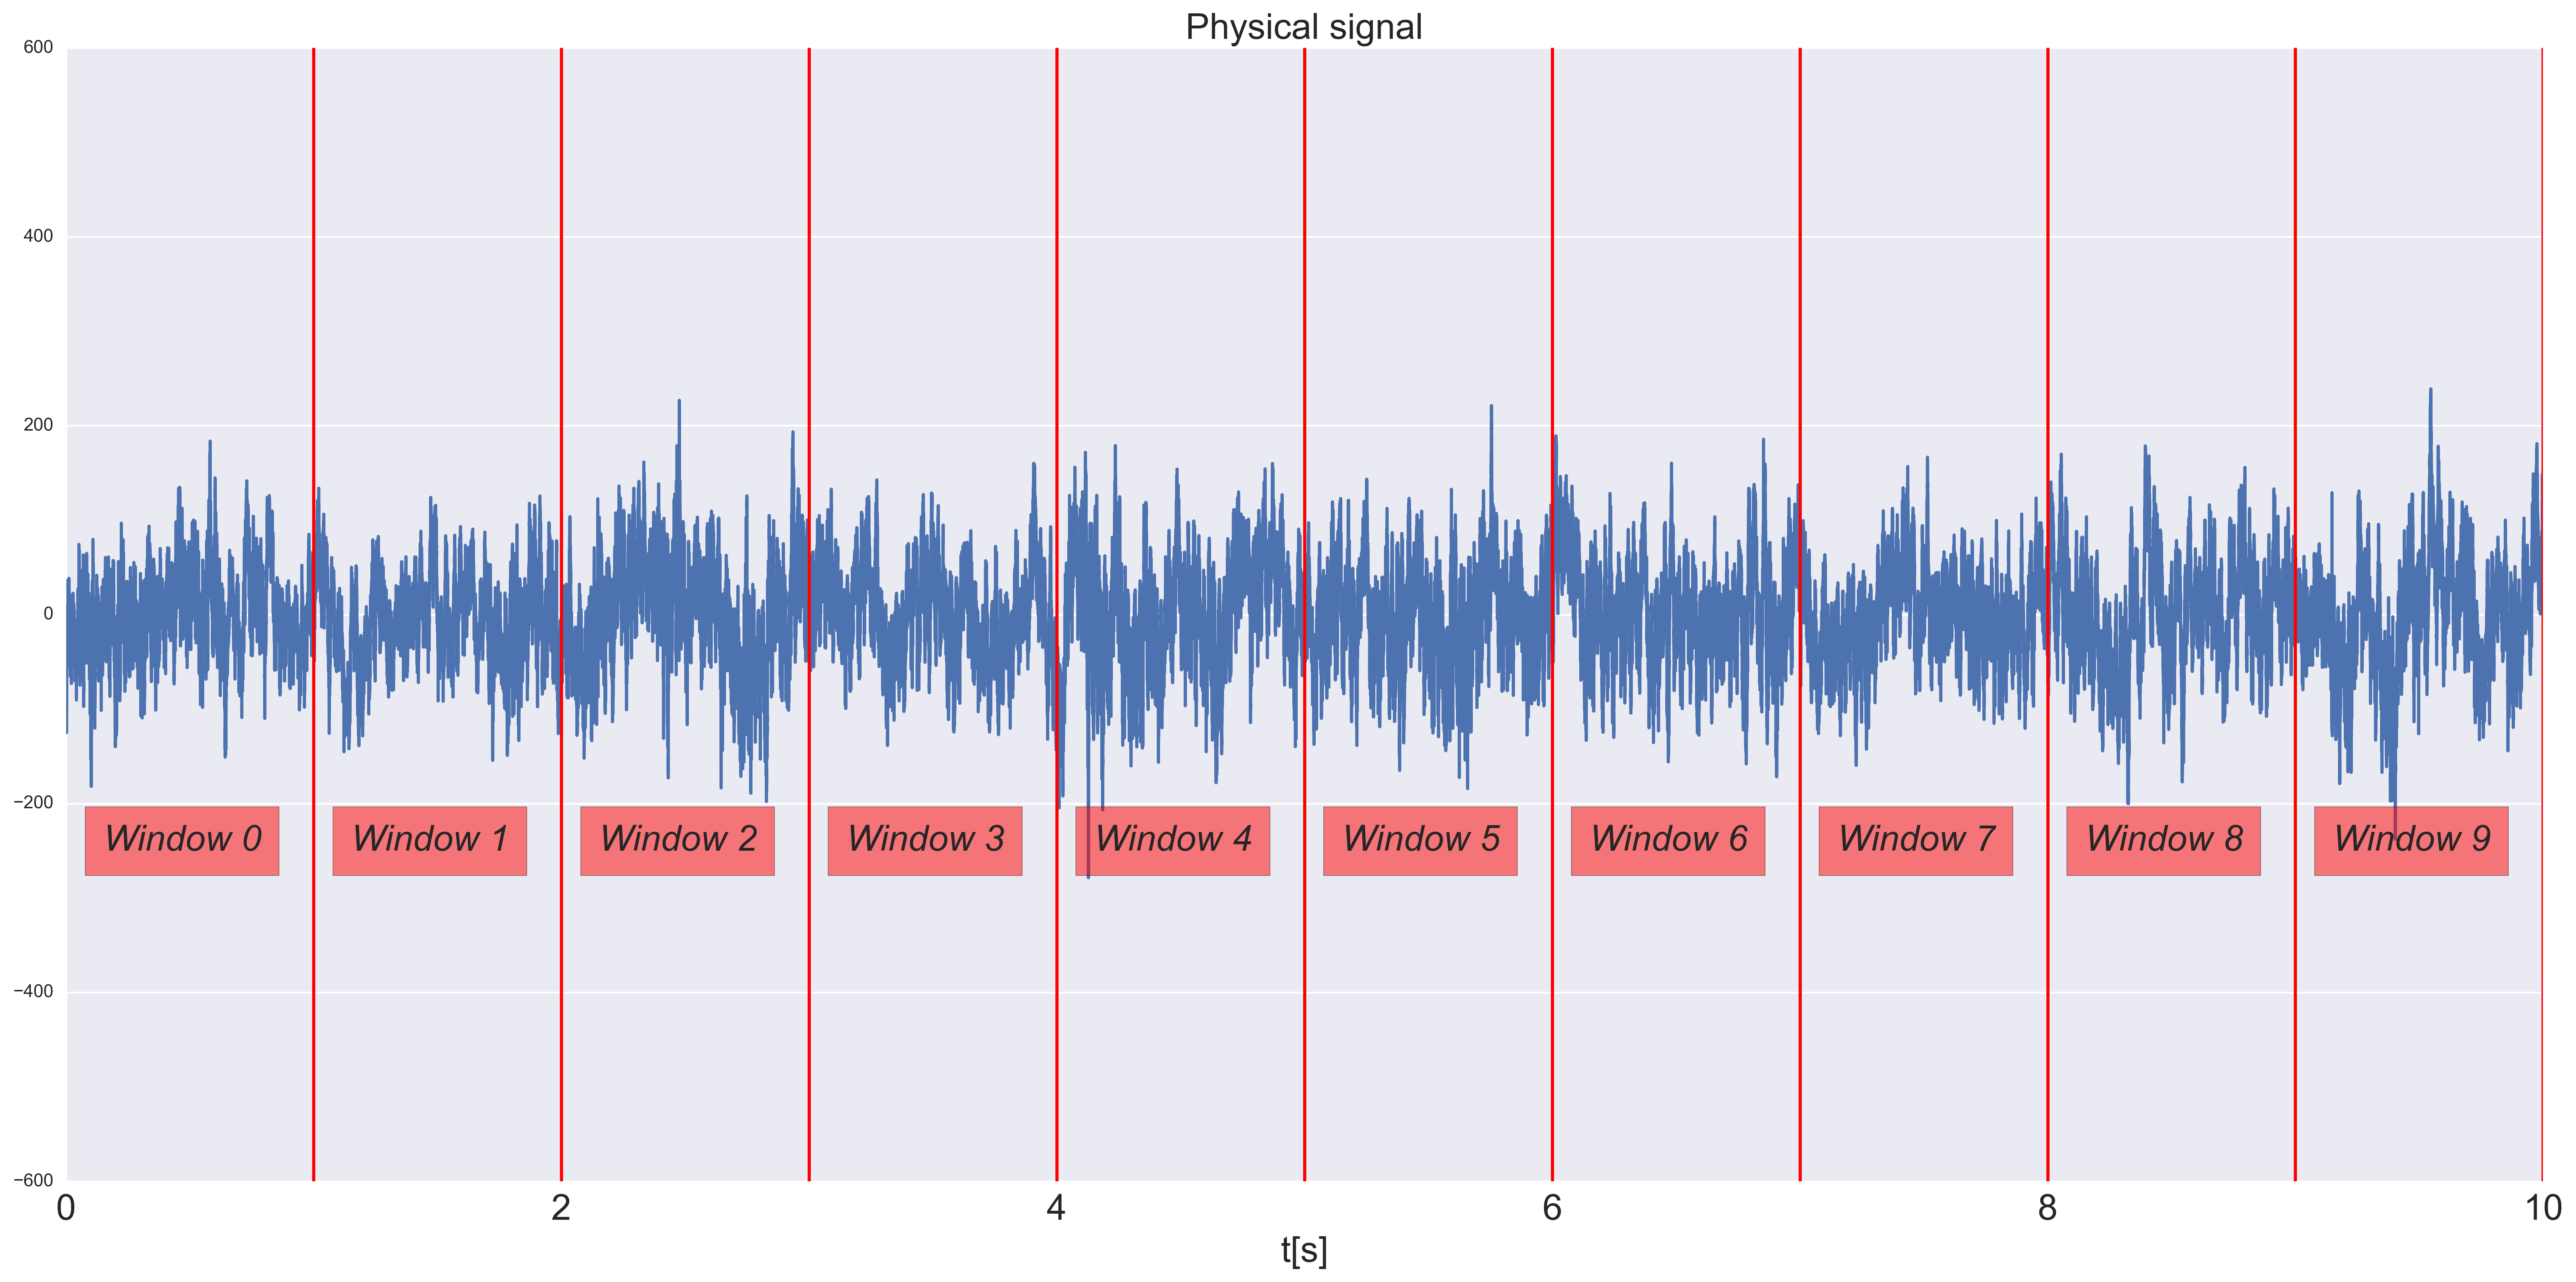

In [6]:
# Accesing the folder where the data is stored
os.chdir('/media/sirota/Data/Data/JM11/2017-01-25_11-49-02')

# Using the OpenEphys functions to load the data from Channel 129. This is the respiration channel of one of the
# experiments in our lab. It captures the breathing of a rat while behaving freely in a maze.
data = OE.load('100_CH129.continuous')


# Extracting the data and the sampling frequency
data_vector = data['data']
fs = data['header']['sampleRate']

# Programatically definition of the periods I want to consider for this example. In this case 10 seemed a good
# number
n_intervals = 10
# The number of samples per interval. Taking the sampling frequency I assume that each window will cover 1 second
size_intervals = fs

# Definition of the intervals
intervals = np.array([[fs*(n-1.0),(fs*n)-1.0] for n in range(1,n_intervals+1)])

# Total array of samples and their translation to seconds, just dividing by the sampling frequency
samples = np.arange(0,intervals[-1,-1]+1)
t = samples*(1.0/fs)



# Extracting the only the data that will be plotted
local_data = data_vector[0:int(intervals[-1,-1])+1]


# Figure definition 
figid = plt.figure(1,figsize=(20, 10), dpi=360)
gs = grds.GridSpec(1,1)
ax1 = plt.subplot(gs[0, :])

# Programatically defined limit for the y axis
ylimit = 600

# Plotting of the data
ax1.plot(t,local_data)

# Plotting of the intervals red borders
for a in intervals:
    # ax1.plot(np.tile([t[int(a[0])],t[int(a[1])]],[2,1]),np.tile([min(local_data),max(local_data)],[2,1]))
    ax1.plot([t[int(a[1])],t[int(a[1])]],[-1*ylimit,ylimit],color='red')

# Setting the xlabel with the desired parameters
override = {
    'fontsize'            : '20',
    'verticalalignment'   : 'top',
    'horizontalalignment' : 'center'
    }
ax1.set_xlabel('t[s]',override)

# Setting the title with the desired parameters
override = {
    'fontsize'            : '20',
    }
ax1.set_title('Physical signal',override)

# Drawing of different labels for the different windows. Just to give the idea of the observation periods with a 
# window of one second. 
for i in range(0,len(intervals)):
    text = 'Window '+str(i)
    ax1.text(0.15+i, -250, text, style='italic',size=20,
            bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

# Setting the limits of the plot to give the best ratio
ax1.set_ylim([-1*ylimit,ylimit])

# Changing the size of the ticks for better visualization
for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)

# Expanding the layout tightly
plt.tight_layout()

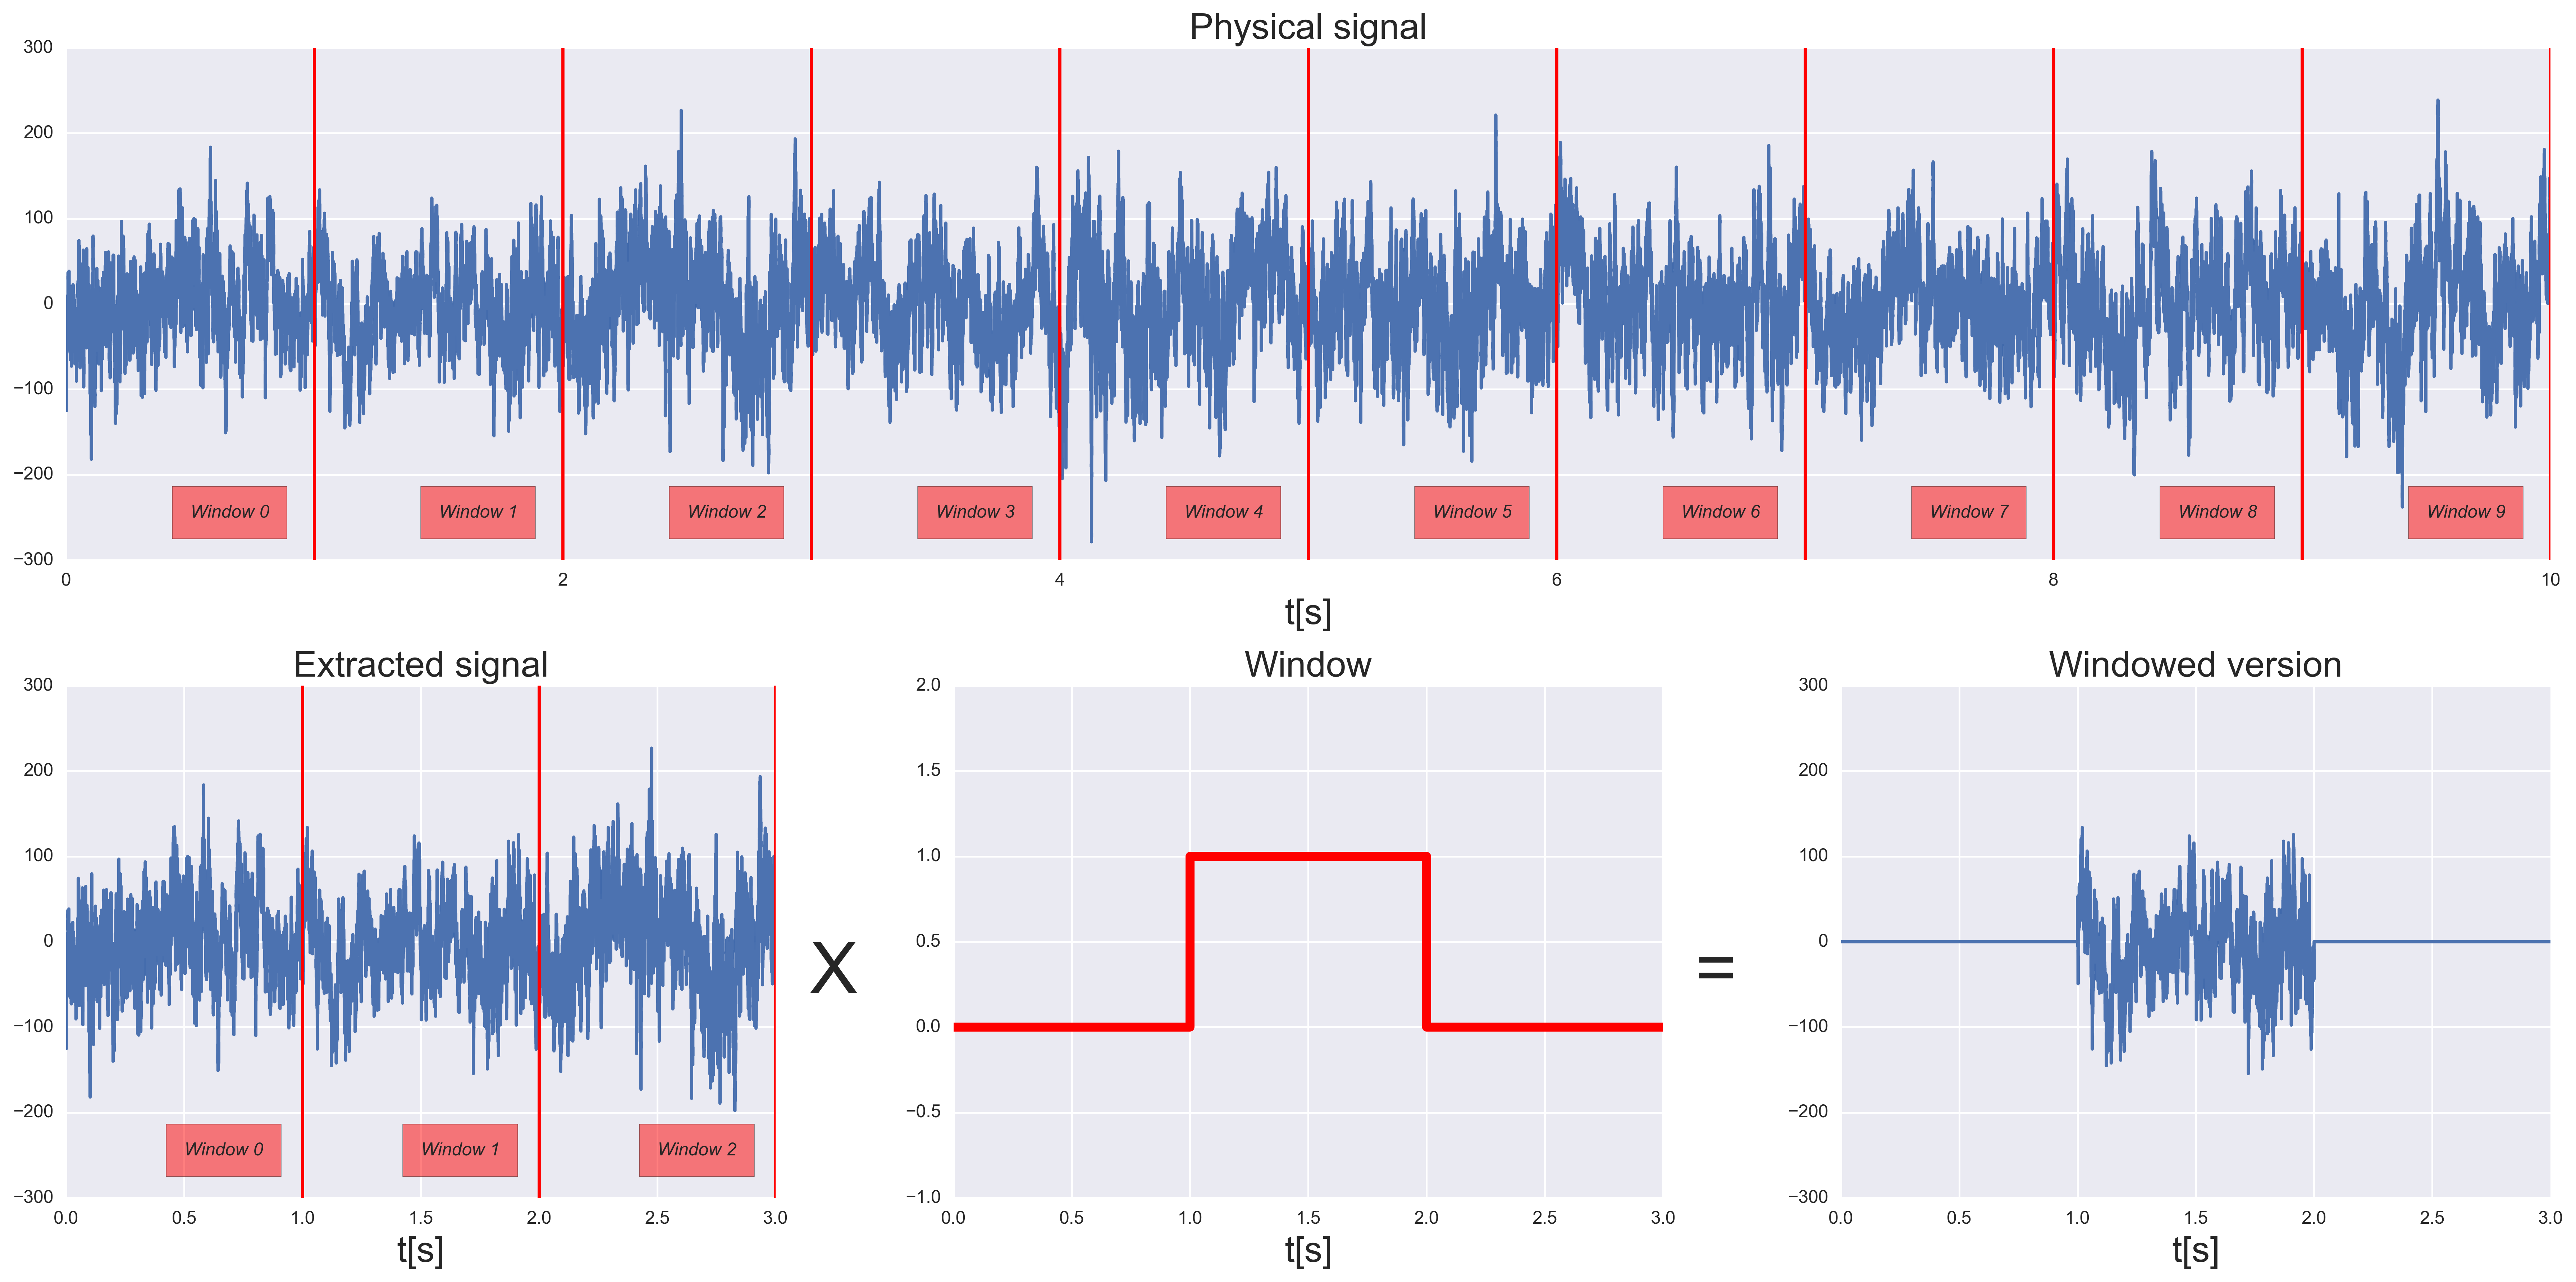

In [7]:
# This last figure do not need much computation it is basically an arrangement of the previous figure. 
# The idea here is to show how the data looks like for the Fourier transform logic

# Definition of the figure.
figid = plt.figure(2,figsize=(20, 10), dpi=360)

# Definition of the matrix of plots. In this case the situation is more complex that is why I need to define a
# matrix. It will be a dim[2x3] matrix.
gs = grds.GridSpec(2,3)
# The first plot will take the whole first row (all the colums of that row)
ax1 = plt.subplot(gs[0, :])
#Then the other three plots will take the postions [1,0],[1,1],[1,2] within the matrix of plots
ax2 = plt.subplot(gs[1,0])
ax3 = plt.subplot(gs[1, 1])
ax4 = plt.subplot(gs[1, 2])

# Tighter y limit in this case
ylimit = 300

# Plotting the data in the first subplot
ax1.plot(t,local_data)

# Plotting the intervals
for a in intervals:
   ax1.plot([t[int(a[1])],t[int(a[1])]],[-1*ylimit,ylimit],color='red')


# Setting the xlabel with the desired parameters
override = {
    'fontsize'            : '20',
    'verticalalignment'   : 'top',
    'horizontalalignment' : 'center'
    }
ax1.set_xlabel('t[s]',override)

# Setting the title with the desired parameters
override = {
    'fontsize'            : '20',
    }
ax1.set_title('Physical signal',override)

# Drawing of different labels for the different windows
for i in range(0,len(intervals)):
    text = 'Window '+str(i)
    ax1.text(0.5+i, -250, text, style='italic',
            bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

# Setting the y limits
ax1.set_ylim([-1*ylimit,ylimit])


# Plotting a zoom in the data
ax2.plot(t[0:int(3*size_intervals)],local_data[0:int(3*size_intervals)])
for i in range(0,3):
    a=intervals[i,:]
    ax2.plot([t[int(a[1])],t[int(a[1])]],[-1*ylimit,ylimit],color='red')

# Drawing of different labels for the different windows
for i in range(0,3):
    text = 'Window '+str(i)
    ax2.text(0.5+i, -250, text, style='italic',
            bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
    
plt.autoscale(enable=True, axis='both', tight=True)

# Setting the y limit
ax2.set_ylim([-1*ylimit,ylimit])

# Setting the xlabel with the desired parameters
override = {
    'fontsize'            : '20',
    'verticalalignment'   : 'top',
    'horizontalalignment' : 'center'
    }
ax2.set_xlabel('t[s]',override)

# Setting the title with the desired parameters
override = {
    'fontsize'            : '20',
    }
ax2.set_title('Extracted signal',override)

# Definition of the window
window_signal = np.zeros((int(3*size_intervals),1))
window_signal[int(intervals[1,0]):int(intervals[1,1])]=1

# Plotting the window
ax3.plot(t[0:int(3*size_intervals)],window_signal,color='red',linewidth=5.0)

# Setting the y limits. The window has unitary amplitude then this limits offer a good overview
ax3.set_ylim([-1,2])

# Setting the ylabel with the desired parameters. The idea of the X is to simulate the product between the 
# previous and this plotted signals
override = {
    'fontsize'            : '40',
    'verticalalignment'   : 'top',
    'horizontalalignment' : 'center'
    }
ax3.set_ylabel('X',override,rotation=0,labelpad=40)

# Setting the xlabel with the desired parameters
override = {
    'fontsize'            : '20',
    'verticalalignment'   : 'top',
    'horizontalalignment' : 'center'
    }
ax3.set_xlabel('t[s]',override)

# Setting the title with the desired parameters
override = {
    'fontsize'            : '20',
    }
ax3.set_title('Window',override)


# The resultant signal of our observation is a windowed version of the original. This is similar to say that the 
# signal is multiplied by different window being each window a different observation. All this of course
# happends in the time domain
windowed_signal = np.multiply(local_data[0:int(3*fs)],np.squeeze(window_signal))

#Plotting the windowed/observed part of the original signal
ax4.plot(t[0:int(3*size_intervals)],windowed_signal)

# Setting the y limits
ax4.set_ylim([-1*ylimit,ylimit])

# Setting the ylabel with the desired parameters. The idea of the = is to show this plot as the result of the
# the product of the two previous plotted signals
override = {
    'fontsize'            : '40',
    'verticalalignment'   : 'top',
    'horizontalalignment' : 'center'
    }
ax4.set_ylabel('=',override,rotation=0,labelpad=40)

# Setting the xlabel with the desired parameters
override = {
    'fontsize'            : '20',
    'verticalalignment'   : 'top',
    'horizontalalignment' : 'center'
    }
ax4.set_xlabel('t[s]',override)

# Setting the title with the desired parameters
override = {
    'fontsize'            : '20',
    }
ax4.set_title('Windowed version',override)

plt.tight_layout()
